# Lab 02
Author: Declan Sheehan [dsheehan1@gulls.salisbury.edu]

Date: September 10th, 2020

Description: Learning OOP Python in order to create geometric shapes for the use of data visualization.

## Task 1
- [X] Write a Python class called Vector to represent a 2-dimensional point/vector, with x and y coordinates
    - [X] Include methods to overload addition and subtraction with other vectors.
    - [X] Include a method to compute the dot product with another vector
    - [X] Include a method to compute the distance to another vector

In [36]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import math

class Vector:
    def __init__(self, x, y):
        self.x_coor = x
        self.y_coor = y
        
    def __add__(self, other):
        return Vector(self.x_coor + other.x_coor, self.y_coor + other.y_coor)
    
    def __sub__(self, other):
        return Vector(self.x_coor - other.x_coor, self.y_coor - other.y_coor)
    
    def dot_product(self, other):
        return ((self.x_coor * other.x_coor) + (self.y_coor * other.y_coor))
    
    def distance(self, other):
        return math.sqrt(math.pow((other.x_coor - self.x_coor), 2) + math.pow((other.y_coor - self.y_coor), 2))
    
    def print_vector(self):
        print("(", self.x_coor, ", ", self.y_coor, ")")
    


# Task 2

- [X] Write a Python class called Geometry that represents a polygon with several vertices and faces, given
by vectors.
    - [X] You will add a face to the geometry by adding both of its constituent vectors. So when you add
a face, check to see if you’re connecting to a vertex that is already present!
    - [X] One way to make the “bookkeeping” simple is to store the vertices and faces separately:
maintain a list or dictionary of vertices and then a list of pairs of those vertices, where a pair
represents a face.
    - [X] Include a method to add a face to the geometry. You do not need to worry about removing
or “splitting” faces.
    - [X] Include a method to check that the geometry is “closed” – the faces create a cycle that start
and end at the same vertex.
- [X] Write a method to draw the outline of the shape with matplotlib.
- [X] Write a method to determine if a given point is inside the geometry.
    - [X] Consider the query point, then “cast a ray” outward from that point in any direction (straight
to the right will the be the easiest to program). Count the number of faces that the ray passes through: if it is odd, the point is inside the
shape; if even, it lies outside.
    - [X] Two special cases to consider:
        - [X] If the ray passes along a face (the body must be non-convex for this), don’t count it as
an intersection.
        - [X] If the ray passes through a vertex exactly, only count it as a single intersection (not both
faces that meet at that vertex).


In [37]:
class Geometry:
    # Initialization:
    def __init__(self):
        self.vertices = []
        self.faces = []
        
    # Add an edge to the shape.
    def add_edge(self, vertexA, vertexB):
        # Make sure not to add duplicate vertices.
        if vertexA not in self.vertices:
            self.vertices.append(vertexA)
        if vertexB not in self.vertices:
            self.vertices.append(vertexB)
        # Add the edge nonetheless.
        self.faces.append((vertexA, vertexB))
    
    # Determines whether the shapes is closed.
    def closed(self):
        check_list = []
        # If there are zero vertices, return empty.
        if not self.vertices:
            return "EMPTY"
        # Grab all instances of the vertices in the edge pair (v1, v2) ...
        for face in self.faces:
            check_list.append(face[0])
            check_list.append(face[1])
        
        # Put the frequency of each unique vertex in a list.
        frequency = list(Counter(check_list).values())
        
        # Only 1 instance of a vertex in this should mean it is open.
        # All 2s should mean the shape is closed.
        if 1 in frequency:
            return "OPEN"
        else:
            return "CLOSED"
    
    # Prints the shape of the Geometric figure in mapplotlib.
    def __str__(self):
        for face in self.faces:
            # Plot every edge [(x1, x2), (y1, y2)]
            plt.plot([face[0].x_coor, face[1].x_coor], [face[0].y_coor, face[1].y_coor])
        plt.show()
        return ""
        
    # Determines whether a point lies in or out of a polygon
    def inside(self, pnt):
        # Counts the number of intersections given the pont
        # and every single edge in the polygon.
        counter = 0
        for face in self.faces:
            counter += self.intersection(face[0], face[1], pnt)
            
        if counter % 2 == 0:
            return "OUTSIDE"
        else:
            return "INSIDE"
    
    # Determines whether the point intersects the pont.
    def intersection(self, v1, v2, pnt):
        # Assign different variables respectively.
        x1, y1 = v1.x_coor, v1.y_coor
        x2, y2 = v2.x_coor, v2.y_coor
        x3, y3 = pnt[0], pnt[1]
        x4, y4 = (x3 + 1000), y3 # To simulate the ray.

        # Convert the segment into a linear equation.
        a1 = y2 - y1
        b1 = x1 - x2
        c1 = (x2 * y1) - (x1 * y2)
        d1 = (a1 * x3) + (b1 * y3) + c1
        d2 = (a1 * x4) + (b1 * y4) + c1

        # Checks to see if d1 and d2 lie on one side of the
        # line segment (No intersection).
        if (d1 > 0 and d2 > 0):
            return 0
        if (d1 < 0 and d2 < 0):
            return 0
        
        # Convert the other segment into a linear equation.
        a2 = y4 - y3
        b2 = x3 - x4
        c2 = (x4 * y3) - (x3 * y4)
        d1 = (a2 * x1) + (b2 * y1) + c2
        d2 = (a2 * x2) + (b2 * y2) + c2

        # Checks to see if d1 and d2 lie on one side of the
        # line segment (No intersection) but for the other.
        if (d1 > 0 and d2 > 0):
            return 0
        if (d1 < 0 and d2 < 0):
            return 0
        
        # Checks to see if the line segments share the same linear path.
        if ((a1 * b2) - (a2 * b1) == 0.0):
            return 2
        # If not it does not not intersect, and is not collinear:
        return 1


- [X] Test your Geometry class and its methods on various shapes: triangle, rectangle, star, etc. Be creative!
Show some examples of the interior/exterior testing (you do not have to illustrate/visualize the raycasting process).

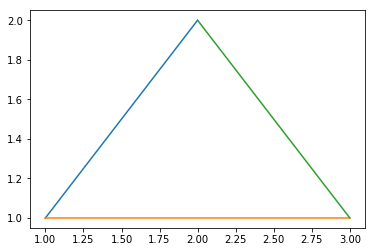

 |--> The shape is: CLOSED and the coordinates (1.5, 1.5) is: OUTSIDE


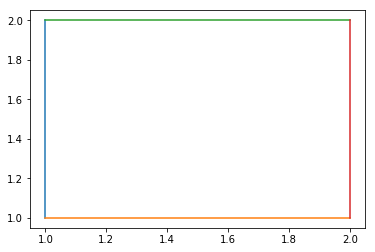

 |--> The shape is: CLOSED and the coordinates (1.5, 1.5) is: INSIDE


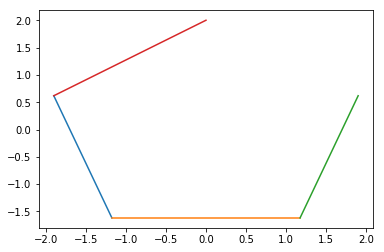

 |--> The shape is: OPEN and the therefore is not a polygon.


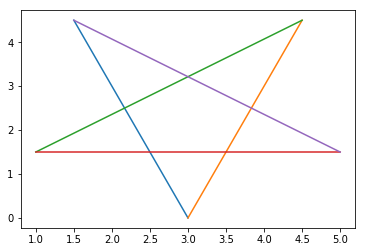

 |--> The shape is: CLOSED and the coordinates (0, 2) is: OUTSIDE


In [38]:
# ========== Testing a regular triangle ==========
Triangle = Geometry()

V1, V2, V3 = Vector(1, 1), Vector(2, 2), Vector(3, 1)

Triangle.add_edge(V1, V2)
Triangle.add_edge(V1, V3)
Triangle.add_edge(V2, V3)

print(Triangle, "|--> The shape is:", Triangle.closed(), "and the coordinates (1.5, 1.5) is:", Triangle.inside((1.5, 1.5)))

# ========== Testing a regular square ==========
Square = Geometry()

VA, VB, VC, VD = Vector(1, 1), Vector(1, 2), Vector(2, 1), Vector(2, 2)

Square.add_edge(VA, VB)
Square.add_edge(VA, VC)
Square.add_edge(VB, VD)
Square.add_edge(VC, VD)
print(Square, "|--> The shape is:", Square.closed(), "and the coordinates (1.5, 1.5) is:", Square.inside((1.5, 1.5)))

# ========== Testing an incomplete pentagon ==========
Pentagon = Geometry()

A, B, C, D, E = Vector(-1.176, -1.618), Vector(-1.902, 0.618), Vector(1.176, -1.618), Vector(1.902, 0.618), Vector(0,2)

Pentagon.add_edge(A, B)
Pentagon.add_edge(A, C)
Pentagon.add_edge(C, D)
Pentagon.add_edge(B, E)

print(Pentagon, "|--> The shape is:", Pentagon.closed(), "and the therefore is not a polygon.")

# ========== Testing a pentagram ==========
Pentagram = Geometry()

V, W, X, Y, Z = Vector(3, 0), Vector(1, 1.5), Vector(5, 1.5), Vector(1.5, 4.5), Vector(4.5, 4.5)

Pentagram.add_edge(V, Y)
Pentagram.add_edge(V, Z)
Pentagram.add_edge(W, Z)
Pentagram.add_edge(W, X)
Pentagram.add_edge(Y, X)

print(Pentagram, "|--> The shape is:", Pentagram.closed(), "and the coordinates (0, 2) is:", Pentagram.inside((0, 2)))
# ========================================
